<a href="https://colab.research.google.com/github/CentenoGarrido/Challenge-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importación de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv'
url2 = 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv'
url3 = 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv'
url4 = 'https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv'

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación

Facturación Tienda 1: $ 1150880400
Facturación Tienda 2: $ 1116343500
Facturación Tienda 3: $ 1098019600
Facturación Tienda 4: $ 1038375700


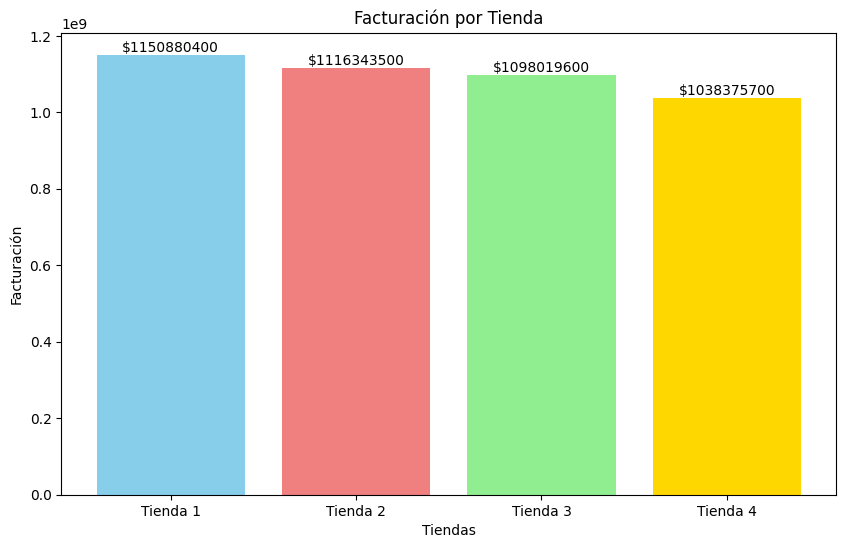

In [2]:
tiendas_df = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

# Calcula la facturación total para cada tienda.
facturacion_por_tienda = {}
for tienda, df in tiendas_df.items():
    facturacion = df['Precio'].sum()
    facturacion_por_tienda[tienda] = facturacion
    print(f'Facturación {tienda}: $ {facturacion:.0f}')

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(facturacion_por_tienda.keys(), facturacion_por_tienda.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Facturación por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Facturación')

# Agrega etiquetas de valor encima de cada barra
for i, v in enumerate(facturacion_por_tienda.values()):
    plt.text(i, v, f'${v:.0f}', ha='center', va='bottom')

plt.show()

# 2. Ventas por Categoría del Producto


Cantidad por categoría en Tienda 1:

    Categoría del Producto  Cantidad por categoría
7                  Muebles                     465
3             Electrónicos                     448
5                 Juguetes                     324
2        Electrodomésticos                     312
1     Deportes y diversión                     284
4   Instrumentos musicales                     182
6                   Libros                     173
0  Artículos para el hogar                     171
__________________________________________________

Cantidad por categoría en Tienda 2:

    Categoría del Producto  Cantidad por categoría
7                  Muebles                     442
3             Electrónicos                     422
5                 Juguetes                     313
2        Electrodomésticos                     305
1     Deportes y diversión                     275
4   Instrumentos musicales                     224
6                   Libros                     197
0  Art

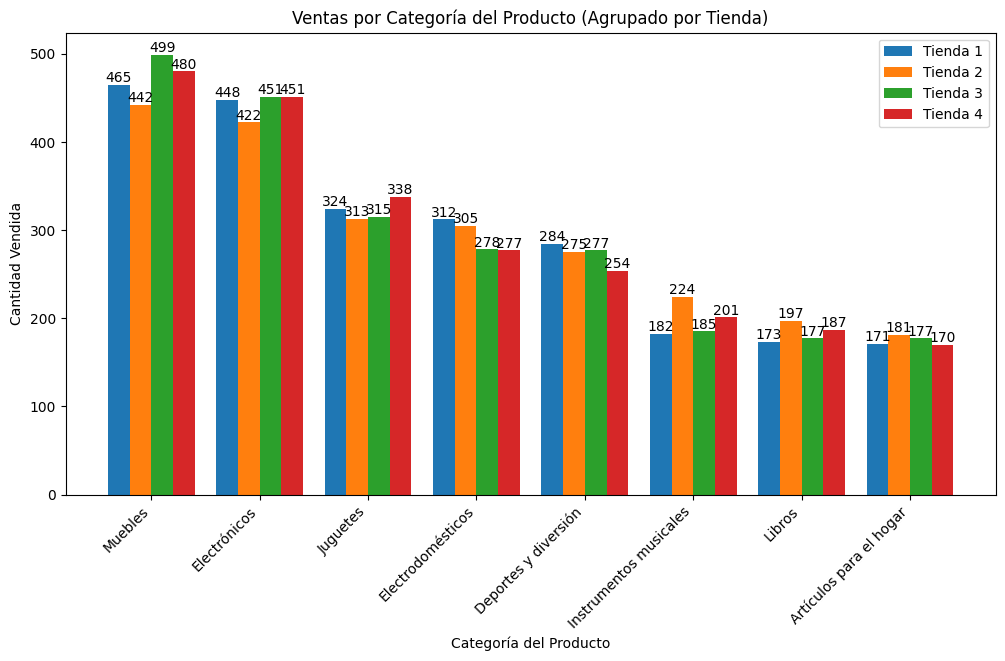

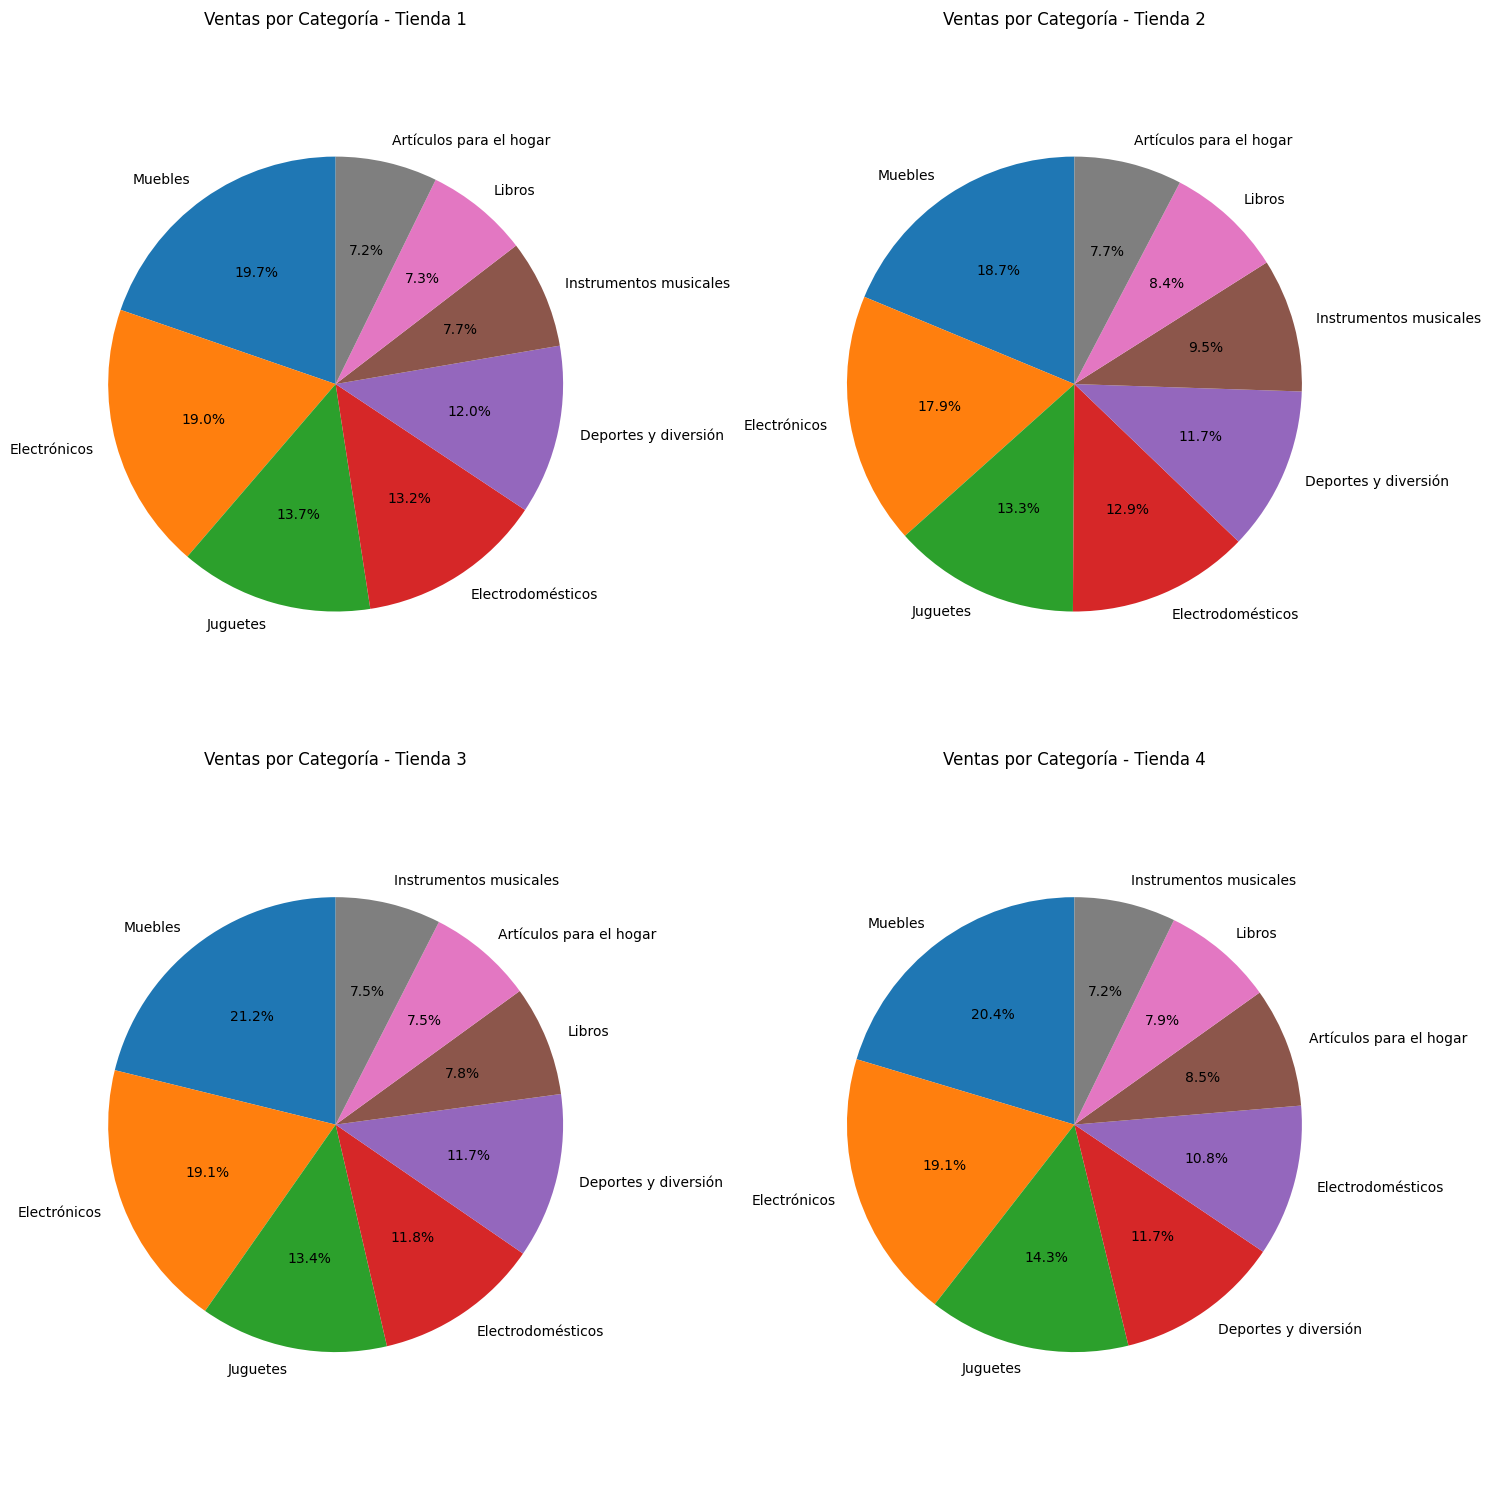

In [3]:
# Agrupa por categoría y suma la cantidad de productos vendidos
cantidad_por_categoria = {}

for tienda, df in tiendas_df.items():
    cantidad_categoria = (
        df.groupby(['Categoría del Producto'])
          .size()
          .reset_index(name='Cantidad por categoría')
          .sort_values(by='Cantidad por categoría', ascending=False)
    )
    cantidad_por_categoria[tienda] = cantidad_categoria
    print(f'\nCantidad por categoría en {tienda}:')
    print(f'\n{cantidad_categoria}')
    print('__________________________________________________')
    #print('\n')

# Gráfico de barras agrupadas para Ventas por Categoría del Producto
width = 0.2  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))

x = range(len(cantidad_por_categoria['Tienda 1']['Categoría del Producto']))

for i, (tienda, df) in enumerate(cantidad_por_categoria.items()):
    ax.bar([xi + i * width for xi in x], df['Cantidad por categoría'], width, label=tienda)
    for j, val in enumerate(df['Cantidad por categoría']):
        ax.text(j + i*width, val, str(val), ha='center', va='bottom')

ax.set_xticks([xi + 1.5 * width for xi in x])
ax.set_xticklabels(cantidad_por_categoria['Tienda 1']['Categoría del Producto'], rotation=45, ha='right')
ax.set_xlabel('Categoría del Producto')
ax.set_ylabel('Cantidad Vendida')
ax.set_title('Ventas por Categoría del Producto (Agrupado por Tienda)')
ax.legend()

# Gráfico de torta para ventas por categoría para cada tienda en una sola figura
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.flatten()  # Aplanar la matriz de subplots

for i, (tienda, df) in enumerate(cantidad_por_categoria.items()):
    axes[i].pie(df['Cantidad por categoría'], labels=df['Categoría del Producto'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Ventas por Categoría - {tienda}')
    axes[i].axis('equal')

plt.tight_layout()

plt.show()

# 3. Calificación promedio de la tienda

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


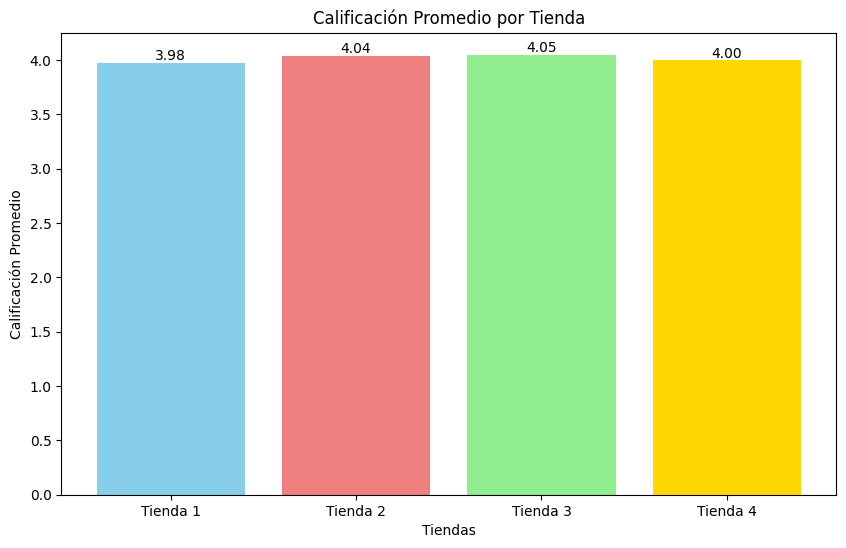

In [4]:
# Calcula la calificación promedio para cada tienda.
calificacion_promedio_por_tienda = {}
for tienda, df in tiendas_df.items():
    calificacion_promedio = df['Calificación'].mean()
    calificacion_promedio_por_tienda[tienda] = calificacion_promedio
    print(f'Calificación promedio {tienda}: {calificacion_promedio:.2f}')

# Crea el gráfico de barras para la calificación promedio.
plt.figure(figsize=(10, 6))
plt.bar(calificacion_promedio_por_tienda.keys(), calificacion_promedio_por_tienda.values(), color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificación Promedio')

# Agrega etiquetas de valor encima de cada barra
for i, v in enumerate(calificacion_promedio_por_tienda.values()):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# 4. Productos más y menos vendidos


Los cinco productos más vendidos en Tienda 1:

Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Producto, dtype: int64
_____________________________________________

Los cinco productos más vendidos en Tienda 2:

Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Producto, dtype: int64
_____________________________________________

Los cinco productos más vendidos en Tienda 3:

Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: Producto, dtype: int64
_____________________________________________

Los cinco productos más vendidos en Tienda 4:

Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55
Na

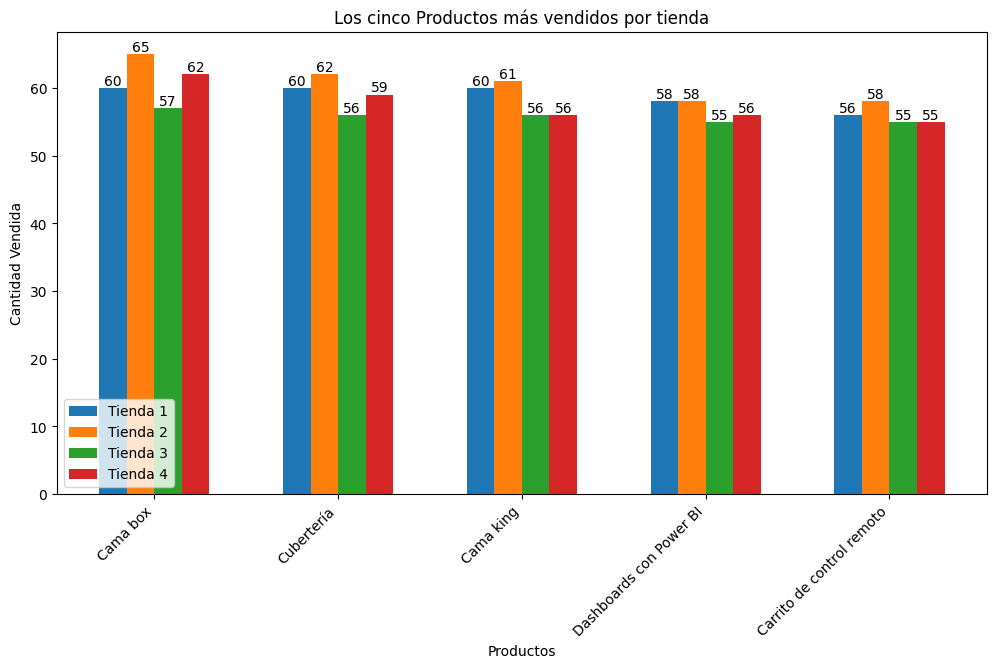

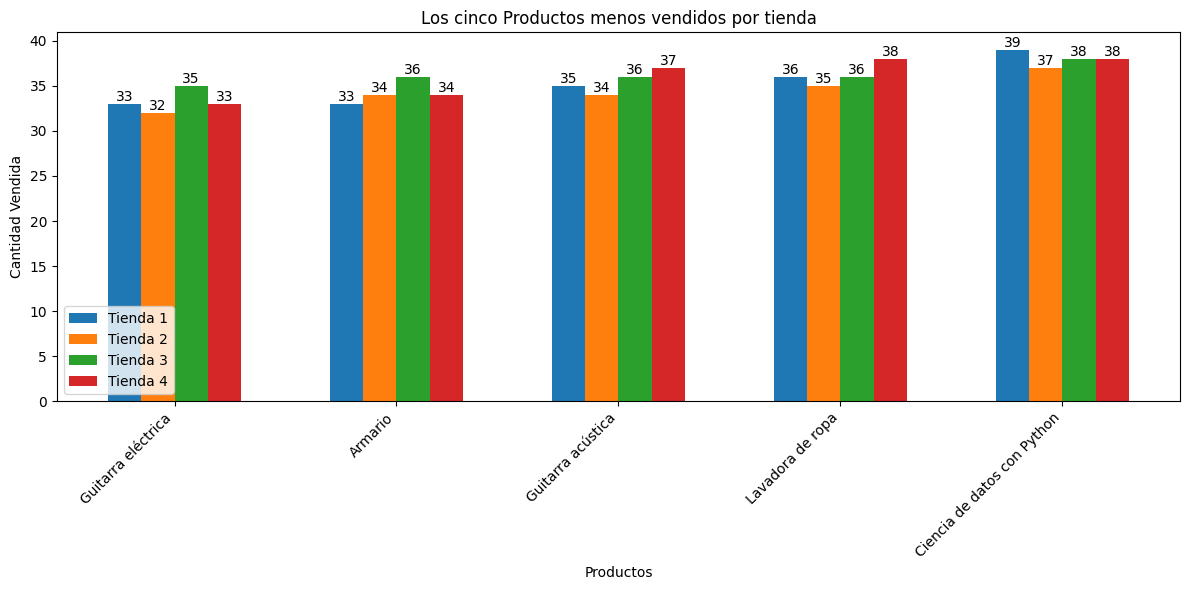

In [5]:
#Los cinco productos más vendidos por tienda
for tienda, df in tiendas_df.items():
    productos_mas_vendidos = df.groupby('Producto')['Producto'].count().sort_values(ascending=False).nlargest(5)
    print(f'\nLos cinco productos más vendidos en {tienda}:')
    print(f'\n{productos_mas_vendidos}')
    print('_____________________________________________')

#Los cinco productos menos vendidos por tienda
for tienda, df in tiendas_df.items():
    productos_menos_vendidos = df.groupby('Producto')['Producto'].count().sort_values().nsmallest(5)
    print(f'\nLos cinco productos menos vendidos en {tienda}:')
    print(productos_menos_vendidos)
    print('_____________________________________________')

# Productos más vendidos (Gráfico de barras agrupadas)
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15

for i, (tienda, df) in enumerate(tiendas_df.items()):
    productos_mas_vendidos = df.groupby('Producto')['Producto'].count().sort_values(ascending=False).nlargest(5)
    x = range(len(productos_mas_vendidos))
    ax.bar([xi + i * width for xi in x], productos_mas_vendidos.values, width, label=tienda)
    for j, val in enumerate(productos_mas_vendidos.values):
        ax.text(j + i*width, val, str(val), ha='center', va='bottom')

ax.set_xticks([xi + 1.5 * width for xi in x])
ax.set_xticklabels(productos_mas_vendidos.index, rotation=45, ha='right')
ax.set_xlabel('Productos')
ax.set_ylabel('Cantidad Vendida')
ax.set_title('Los cinco Productos más vendidos por tienda')
ax.legend()
#plt.tight_layout()

# Productos menos vendidos (Gráfico de barras agrupadas)
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15

for i, (tienda, df) in enumerate(tiendas_df.items()):
    productos_menos_vendidos = df.groupby('Producto')['Producto'].count().sort_values(ascending=False).nsmallest(5)
    x = range(len(productos_menos_vendidos))
    ax.bar([xi + i * width for xi in x], productos_menos_vendidos.values, width, label=tienda)
    for j, val in enumerate(productos_menos_vendidos.values):
        ax.text(j + i*width, val, str(val), ha='center', va='bottom')

ax.set_xticks([xi + 1.5 * width for xi in x])
ax.set_xticklabels(productos_menos_vendidos.index, rotation=45, ha='right')
ax.set_xlabel('Productos')
ax.set_ylabel('Cantidad Vendida')
ax.set_title('Los cinco Productos menos vendidos por tienda')
ax.legend()
plt.tight_layout()

plt.show()

# 5. Envío promedio por tienda

In [6]:
# Envío promedio por tienda.
envio_promedio_por_tienda = {}
for tienda, df in tiendas_df.items():
    envio_promedio = df['Costo de envío'].mean()
    envio_promedio_por_tienda[tienda] = envio_promedio
    print(f'Envío promedio {tienda}: $ {envio_promedio:.0f}')

Envío promedio Tienda 1: $ 26019
Envío promedio Tienda 2: $ 25216
Envío promedio Tienda 3: $ 24806
Envío promedio Tienda 4: $ 23459


**INFORME**

1. *Análisis de facturación:*

  Ventas por tienda:

      * Facturación Tienda 1: $ 1 150 880 400
      * Facturación Tienda 2: $ 1 116 343 500
      * Facturación Tienda 3: $ 1 098 019 600
      * Facturación Tienda 4: $ 1 038 375 700

  La tienda que más facturó fue la Tienda 1. La que menos facturó fue la Tienda 4.

2. *Ventas por categorías:*

  La tres categorías que más ventas produjeron fueron:

    1. Muebles.
    2. Electrónicos.
    3. Juguetes

  Las tres categorías que menos ventas produjeron fueron:

    1. Instrumentos musicales.
    2. Libros.
    3. Artículos para el hogar.

3. *Calificaciones promedio por tienda:*

    * Tienda 1: 3.98
    * Tienda 2: 4.04
    * Tienda 3: 4.05
    * Tienda 4: 4.00
  
  La tienda 3 posee mejor calificación promedio. Aunque la puntuaciones son similares.

4. *Productos vendidos por tienda:*
*Productos más vendidos por tienda:*

||Tienda 1|Tienda 2|Tienda 3|Tienda 4|
|---|---|---|---|---|
|1|Armario|Iniciando en programación|Kit de bancas|Cama box|
|2|TV LED UHD 4K|Microondas|Mesa de comedor|Cubertería|
|3|Microondas|Batería|Cama king|Cama king|
|4|Secadora de ropa|Pandereta|Set de ollas|Dashboards con Power BI|  
|5|Mesa de noche|Guitarra acústica|Mesa de noche|Carrito de control remoto|


  *Productos menos vendidos por tienda:*

| |Tienda 1|Tienda 2|Tienda 3|Tienda 4|
|-|-|-|-|-|
|1|Auriculares con micrófono|Juego de mesa|Bloques de construcción|Guitarra eléctrica|
|2|Celular ABXY|Impresora|Set de vasos|Armario|
|3|Olla de presión|Mesa de comedor|Mochila|Guitarra acústica|
|4|Pandereta|Sillón|Microondas|Ciencia de datos con Python|
|5|Ciencia de datos con Python|Auriculares|Vaso térmico|Lavadora de ropa||


5. *Costo promedio de los envíos:*

    * Tienda 1: $ 26019
    * Tienda 2: $ 25216
    * Tienda 3: $ 24806
    * Tienda 4: $ 23459

  La tienda 4 es la que menos cobra por enviar el producto.

*CONCLUSIONES*

Teniendo en cuenta la facturaciones de las tiendas (quizás el factor más importante) y que los demás indicadores son parecidos, la sugerencia es vender la tienda 4, que es la que menos ingresos posee.